# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [12]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [13]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  19.1M      0 --:--:--  0:00:45 --:--:-- 11.5M


In [14]:
!gunzip SUSY.csv.gz

In [15]:
filename = "/content/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta",
            "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
            "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

# df = pd.read_csv(filename, dtype='float64', names=VarNames, compression='gzip')
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [16]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [17]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [18]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

In [19]:
print(Test_sig.columns)
print(Test_bkg.columns)
print(VarNames[1:])

Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')
Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')
['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']


In [20]:
Test_sig.columns = VarNames
Test_bkg.columns = VarNames

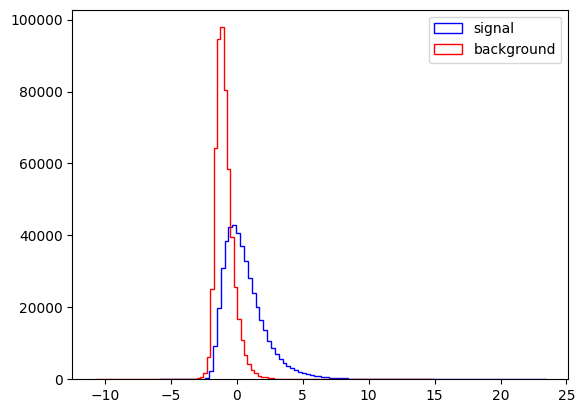

In [21]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

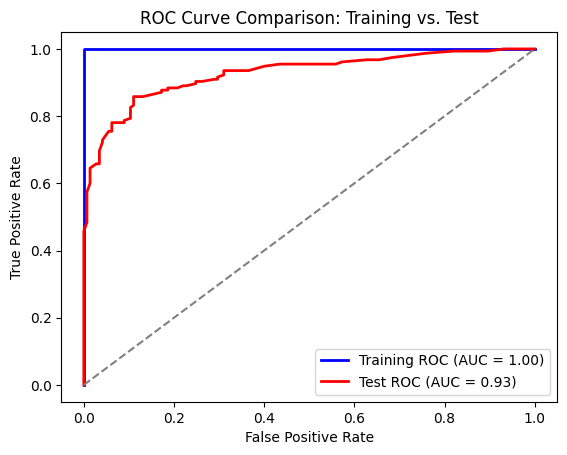

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a sample dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict probabilities for both training and test sets
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curves for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC (Area Under Curve) for each ROC curve
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Training vs. Test')
plt.legend(loc='lower right')
plt.show()

If the test ROC curve is close to the training ROC curve, it suggests that the model generalizes well and there's little to no overfitting.
If the test ROC curve is significantly lower than the training ROC curve, it indicates that the model might be overfitting to the training data, resulting in poor generalization to new data. This suggests a potential bias or overfitting issue.

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

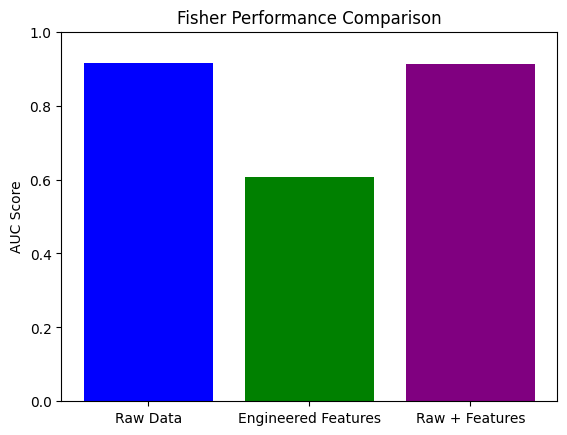

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define raw data (original features)
X_raw_train, X_raw_test = X_train, X_test

# Define additional engineered features (e.g., statistical summary of existing features)
X_features_train = np.c_[X_train.mean(axis=1), X_train.std(axis=1)]
X_features_test = np.c_[X_test.mean(axis=1), X_test.std(axis=1)]

# Combine raw data and engineered features
X_raw_plus_features_train = np.c_[X_raw_train, X_features_train]
X_raw_plus_features_test = np.c_[X_raw_test, X_features_test]

# Initialize Fisher (LDA) models
lda_raw = LinearDiscriminantAnalysis()
lda_features = LinearDiscriminantAnalysis()
lda_raw_plus_features = LinearDiscriminantAnalysis()

# Train models on different types of input
lda_raw.fit(X_raw_train, y_train)
lda_features.fit(X_features_train, y_train)
lda_raw_plus_features.fit(X_raw_plus_features_train, y_train)

# Predict probabilities for each model on test set
y_proba_raw = lda_raw.predict_proba(X_raw_test)[:, 1]
y_proba_features = lda_features.predict_proba(X_features_test)[:, 1]
y_proba_raw_plus_features = lda_raw_plus_features.predict_proba(X_raw_plus_features_test)[:, 1]

# Calculate AUC as performance metric
auc_raw = roc_auc_score(y_test, y_proba_raw)
auc_features = roc_auc_score(y_test, y_proba_features)
auc_raw_plus_features = roc_auc_score(y_test, y_proba_raw_plus_features)

# Plot the results
plt.figure()
x_labels = ['Raw Data', 'Engineered Features', 'Raw + Features']
auc_scores = [auc_raw, auc_features, auc_raw_plus_features]
plt.bar(x_labels, auc_scores, color=['blue', 'green', 'purple'])
plt.ylabel('AUC Score')
plt.title('Fisher Performance Comparison')
plt.ylim(0, 1)
plt.show()


If raw + features performs the best, it suggests that both original data and engineered features together provide more discriminative power.
If features alone perform comparably or better, it may suggest that engineered features capture essential information, possibly even more effectively than raw data alone.

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [ ]:
#part a
#Logistic Regression (from Linear Models) - It’s simple, interpretable, and performs well for linearly separable data.
#Random Forest (from Ensembles) - A versatile and robust model that often performs well on complex datasets by using multiple decision trees.
#Support Vector Machine (SVM) - Known for maximizing the margin between classes and handling non-linear data well with kernel functions.


In [24]:
#part b
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, precision, recall

In [25]:
#part c
import numpy as np

def compute_significance(n_s, n_b):
    return n_s / np.sqrt(n_s + n_b)

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [26]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
import pandas as pd

def evaluate_and_display_metrics(clf, X_train, X_test, y_train, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Confusion Matrix for TPR, FPR
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Maximal significance calculation (assuming n_s = tp and n_b = fp for simplicity)
    significance = tp / (tp + fp)**0.5 if (tp + fp) > 0 else 0

    # Store results in a DataFrame
    metrics_df = pd.DataFrame({
        "Metric": ["TPR (Recall)", "FPR", "Accuracy", "Precision", "F1 Score", "AUC", "Maximal Significance"],
        "Value": [tpr, fpr, accuracy, precision, f1, auc, significance]
    })

    return metrics_df

# Usage example for a classifier (e.g., logistic regression)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
metrics_table = evaluate_and_display_metrics(clf, X_train, X_test, y_train, y_test)
print(metrics_table)

                 Metric      Value
0          TPR (Recall)   0.825806
1                   FPR   0.124138
2              Accuracy   0.850000
3             Precision   0.876712
4              F1 Score   0.850498
5                   AUC   0.914171
6  Maximal Significance  10.593355
